In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from envencoder.history_tracker_v2 import CUSUM
import os 
from parameter.optm_Params import Parameters
import json
from algorithms.Trainer import SimpleTrainer

In [2]:
def generate_data(num_sample1,num_sample2,mean1,mean2,n_repeat):
    samples = []
    for _ in range(n_repeat):
        sample1 = np.random.normal(loc = mean1,scale=0.1,size = (num_sample1,))
        sample2 = np.random.normal(loc = mean2,scale=0.5,size = (num_sample2,))
        sample = np.concatenate((sample1,sample2))
        samples.append(sample)
    samples = np.concatenate(samples)
    return samples 

In [3]:
def prepare_parameter(config_path):
    config_path = os.path.join(config_path,'parameter.json')
    with open(config_path,'r') as f :
        config = json.load(f)
    config['device'] = 'cpu'
    config['cuda'] = False
    config['use_wandb'] = False 
    with open(config_path,'w') as f:
        json.dump(config,f)
    parameter = Parameters(config_path=config_path,default_config_path=config_path)
    return parameter 

In [4]:
parameter = prepare_parameter("data/temporary/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N")
parameter.adaptive_envtracker = True
parameter.adaptive_type = '2'
# print(type(parameter.adaptive_type))

Defaul config path: data/temporary/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/parameter.json
Use additional config


In [5]:
trainer = SimpleTrainer(parameter,log_dir="data/visualization_results")

mv data/visualization_results/log_file/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/log.txt data/visualization_results/log_file/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/log_back.txt
Logging data to data/visualization_results/log_file/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/progress.txt
my output path is data/visualization_results/log_file/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N
directory data/visualization_results/log_file/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N exists, checking identity...
config is completely same, file will be overwrited anyway...
save json config to data/visualization_results/log_file/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/parameter.json
save readable config to data/visualization_results/log_file/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/parameter.txt
rm -rf data/visualization_results/log_file/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/events.out.tfevents*


objc[45776]: Class GLFWApplicationDelegate is implemented in both /Users/jijingtian/opt/anaconda3/envs/meta/lib/python3.7/site-packages/mujoco_py/binaries/macos/mujoco210/bin/libglfw.3.dylib (0x14f37f778) and /usr/local/Cellar/glfw/3.3.3/lib/libglfw.3.3.dylib (0x14f3ebf40). One of the two will be used. Which one is undefined.
objc[45776]: Class GLFWWindowDelegate is implemented in both /Users/jijingtian/opt/anaconda3/envs/meta/lib/python3.7/site-packages/mujoco_py/binaries/macos/mujoco210/bin/libglfw.3.dylib (0x14f37f700) and /usr/local/Cellar/glfw/3.3.3/lib/libglfw.3.3.dylib (0x14f3ebf68). One of the two will be used. Which one is undefined.
objc[45776]: Class GLFWContentView is implemented in both /Users/jijingtian/opt/anaconda3/envs/meta/lib/python3.7/site-packages/mujoco_py/binaries/macos/mujoco210/bin/libglfw.3.dylib (0x14f37f7a0) and /usr/local/Cellar/glfw/3.3.3/lib/libglfw.3.3.dylib (0x14f3ebfb8). One of the two will be used. Which one is undefined.
objc[45776]: Class GLFWWindow

EnvTracker_v3_2
EnvTracker_v3_2
EnvTracker_v3_2
EnvTracker_v3_2
EnvTracker_v3_2
EnvTracker_v3_2


In [6]:
trainer.load("data/temporary/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/model")

loading from data/temporary/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/model/mlppolicy.pt..
loading from data/temporary/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/model/value0.pt..
loading from data/temporary/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/model/value1.pt..
loading from data/temporary/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/model/valuetarget0.pt..
loading from data/temporary/HalfCheetah-v2-Baseline-MiddleModel-CodeTest_N/model/valuetarget1.pt..


4421.139117210124


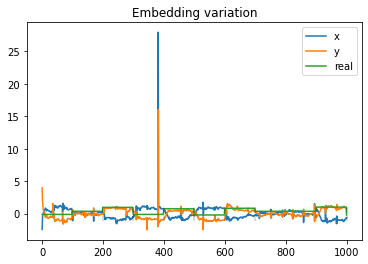

In [7]:
fig,df,embs,change_inds,(diff_from_expert, at_target_ratio) = trainer.get_figure(trainer.ns_test_agent,trainer.sac.policy,trainer.encoder,device = 'cpu',
    num_steps=1000,with_weight=False)

print(np.sum(df['rew']))

6123.286022192857


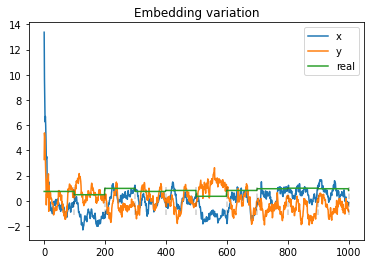

In [8]:
fig,df,embs,change_inds,(diff_from_expert, at_target_ratio) = trainer.get_figure(trainer.ns_test_agent,trainer.sac.policy,trainer.encoder,device = 'cpu',
    num_steps=1000,with_weight=False)

print(np.sum(df['rew']))

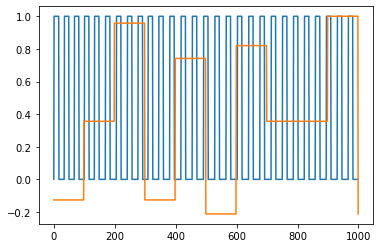

In [8]:
plt.plot(df['step'],df['update_flags'])
plt.plot(df['step'],df['real_para'])

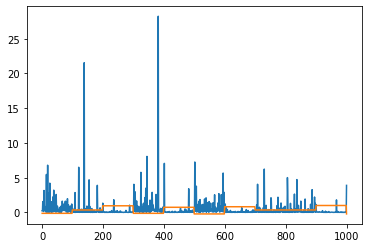

In [9]:
plt.plot(df['step'],df['err'])
plt.plot(df['step'],df['real_para'])

In [11]:
moco = trainer.encoder.moco

res = []
for k,v in moco.mean_embs.items():
    res.append(v.detach().numpy())
res = np.stack(res,axis=0)

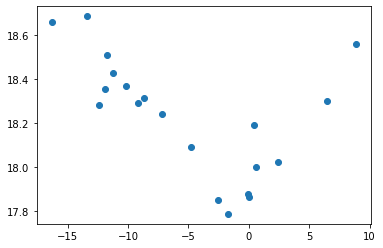

In [12]:
plt.scatter(res[:,0],res[:,1])